In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

<br>
<font size=5>Оценка решающего критерия</font>
<hr>

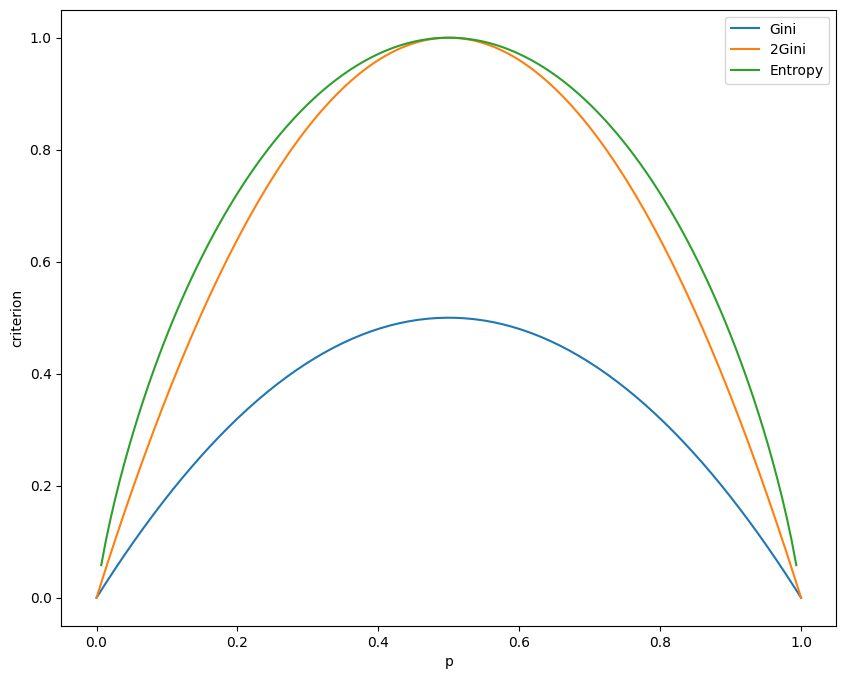

In [2]:
plt.figure(figsize=(10, 8))
values = np.linspace(0, 1, 150)
plt.plot(values, [2 * p * (1 - p) for p in values], label='Gini')
plt.plot(values, [4 * p * (1 - p) for p in values], label='2Gini')
plt.plot(values, [-p*np.log2(p) - (1-p)*np.log2(1-p) for p in values], label='Entropy')
plt.xlabel('p')
plt.ylabel('criterion')
plt.legend()
plt.show()

<br>
<font size=5>Пример scikit-learn</font>
<hr>

Генерация данных

In [3]:
# первый класс
np.random.seed(7)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.concatenate((train_data, np.random.normal(size=(100, 2), loc=2)))
train_labels = np.concatenate((train_labels, np.ones(100)))
data = pd.DataFrame(np.concatenate((train_data, train_labels[:, np.newaxis]), axis=1), columns=['feature1', 'feature2', 'target'])
#data['target'] = train_labels
data

,feature1,feature2,target
0,1.690526,-0.465937,0.0
1,0.032820,0.407516,0.0
2,-0.788923,0.002066,0.0
3,-0.000890,-1.754724,0.0
4,1.017658,0.600499,0.0
...,...,...,...
195,2.159358,2.787799,1.0
196,1.114955,1.712842,1.0
197,0.392787,2.972893,1.0
198,2.038418,2.489822,1.0


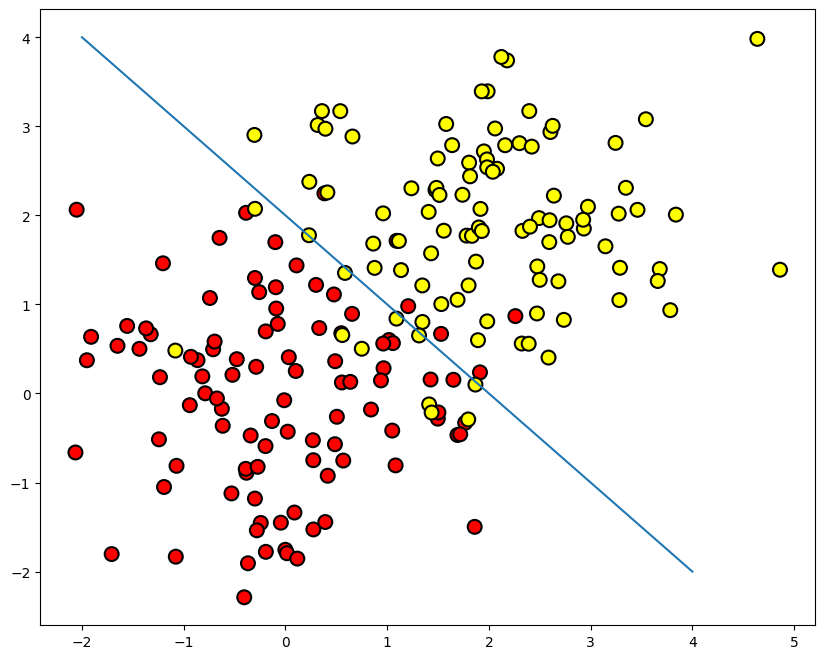

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
            cmap='autumn', edgecolor='black', linewidth=1.5)
plt.plot(range(-2, 5), range(4, -3, -1))

In [5]:
def get_grid(data):
    xx, yy = np.meshgrid(np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), 500),
                         np.linspace(np.min(data[:, 1]), np.max(data[:, 1]), 500))
    return xx, yy

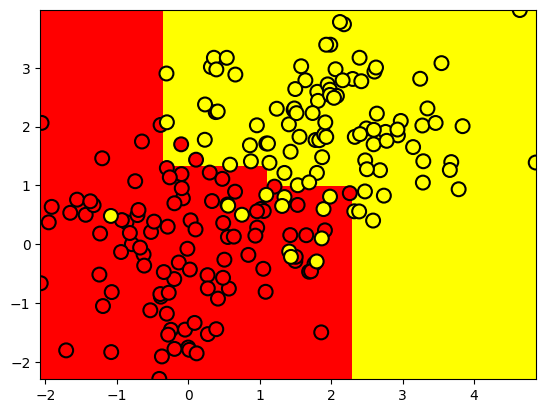

In [6]:
from sklearn.tree import DecisionTreeClassifier


clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)
clf_tree.fit(train_data, train_labels)

xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5)

In [7]:
from sklearn.tree import export_graphviz
export_graphviz(clf_tree, feature_names=['x1', 'x2'], out_file='small_tree.dot', filled=True)


In [8]:
!dot -Tpng 'small_tree.dot' -o 'small_tree.png'

<br>
<font size=5>Decision Tree Regressor</font>
<hr>

In [9]:
n_train = 150
n_test = 1000
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

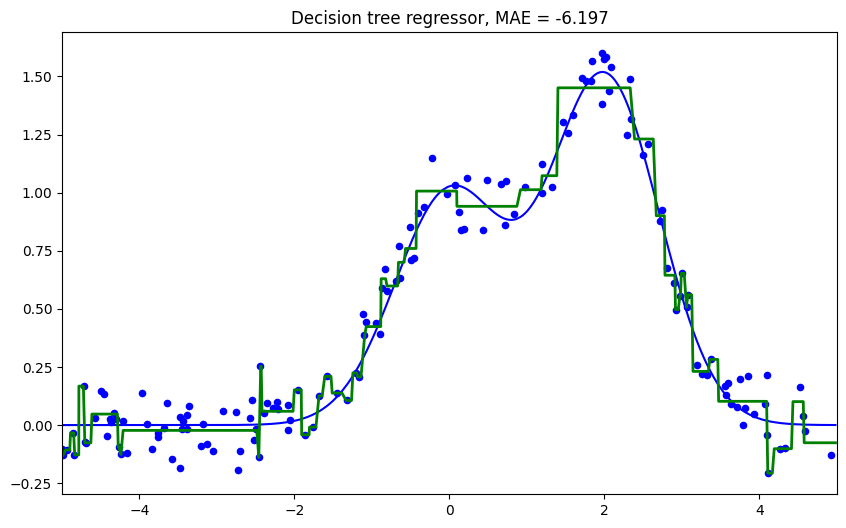

In [10]:
from sklearn.tree import DecisionTreeRegressor


reg_tree = DecisionTreeRegressor(max_depth=6, random_state=17)
reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), 'b')
plt.scatter(X_train, y_train, c='b', s=20)
plt.plot(X_test, reg_tree_pred, c='g', lw=2)
plt.xlim([-5, 5])
plt.title(f'Decision tree regressor, MAE = {np.sum((y_test-reg_tree_pred)):.4}')
plt.show()

<br>
<font size=4>Сложный случай для деревьев решений</font>
<br><br>

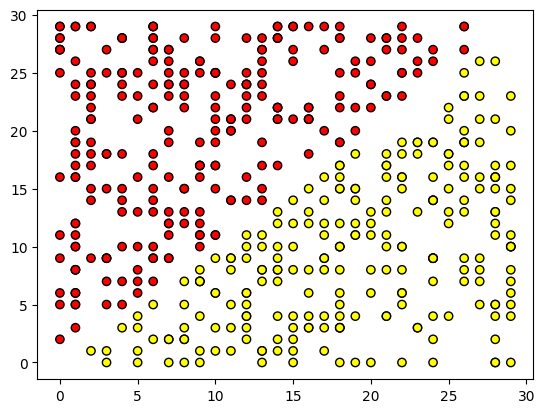

In [12]:
def from_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1, x2 = np.random.randint(x1_min, x1_max), np.random.randint(x2_min, x2_max)
        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)
      
X, y = from_linearly_separable_data()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black')

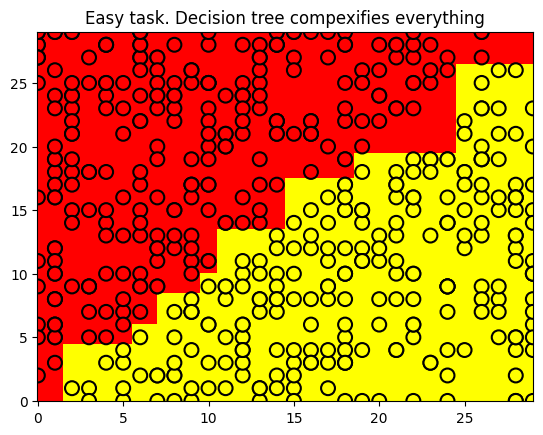

In [30]:
tree = DecisionTreeClassifier(max_depth=7, random_state=17).fit(X, y)

xx, yy = get_grid(X)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100,
            cmap='autumn', edgecolors='black', linewidth=1.5)
plt.title("Easy task. Decision tree compexifies everything")
plt.show()

<br>
<font size=5>Плюсы и минусы Decision Tree</font>
<hr>
<br>
<b>Плюсы:</b>

 - Порождение четких правил классификации, понятных человеку, например, "если возраст < 25 и интерес к мотоциклам, то отказать в кредите".<br>
 Это свойство называют интерпретируемостью модели.
 - Быстрые процессы обучения и прогнозирования.
 - Малое число параметров модели.
 - Поддержка числовых и категориальных признаков.
 
<b>Минусы:</b>
 - У порождения четких правил классификации есть и другая сторона: деревья очень чувствительны к шумам во входных данных, вся модель может кардинально измениться, если немного изменится обучающая выборка(
 например, если убрать один из признаков или добавить несколько объектов).
 - Разделяющая граница, построенная деревом решений, имеет свои ограничения (состоит из гиперплоскостей, перпендикулярных какой-то из координатной оси), и на практике дерево решений по качеству классификации уступает некоторым другим методам.
 - Необходимость отсекать ветви дерева (pruning) или устанавливать минимальное число элементов в листьях дерева или максимальную глубину дерева для борьбы с переобучением. 
 - Проблема поиска оптимального дерева решений(минимального по размеру и способного без ошибок классифицировать выборку)
 - Сложно поддерживаются пропуски в данных. 
 - Модель умеет только интерполировать, но не экстраполировать (это и для леса и для бустинга на деревьях). То есть дерево решений делает константный прогноз для объектов, находящихся в признаковом пространстве вне параллелепипеда, охватывающего все объекты обучающей выборки. В нашем примере с желтыми и синими шариками это значит, что модель дает одинаковый прогноз для всех шариков с координатой > 19 или < 0.
<br>
<br>